# data exploration

In [1]:
# import package
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
#import plotly
import os
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#Set path of the raw data
raw_data_path = os.path.join(os.path.pardir,'data','train-features')
train_file_path = os.path.join(raw_data_path,'Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_-_Training_Features.csv')
#test_file_path = os.path.join(raw_data_path,'test.csv')

In [4]:
# read the data with all default parameters
train_df= pd.read_csv(train_file_path,index_col='respondent_id')
#test_df= pd.read_csv(test_file_path,index_col='respondent_id')

In [5]:
#Explore train dataset structure
train_df.info()
train_df.head()
train_df.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg
26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN


In [6]:
#respondents distribution by gender
##--train_df['sex']
male_respondents = train_df.loc[train_df.sex=='Male',:]
print('Number of male respondents : {0}'.format(len(male_respondents)))

female_respondents = train_df.loc[train_df.sex=='Female',:]
print('Number of female respondents : {0}'.format(len(female_respondents)))

##---OR

train_df.sex.value_counts()
train_df.sex.value_counts(normalize= True) # to show proportion


Number of male respondents : 10849
Number of female respondents : 15858


Female    15858
Male      10849
Name: sex, dtype: int64

Female    0.593777
Male      0.406223
Name: sex, dtype: float64

In [7]:
#fetch the summary statistics for all variables
train_df.describe(include='all')

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,22284,25299,24665,25244,26707,26707,26458.000000,26458.000000,13377,13237
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,2,2,3,10,3,NaN,NaN,21,23
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",NaN,NaN,fcxhlnwr,xtkaffoo
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12777,13555,18736,13560,4297,11645,NaN,NaN,2468,1778
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,NaN,NaN
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN


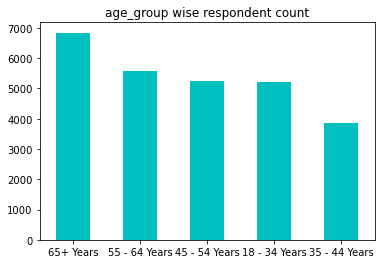

In [8]:
#View distribution by age_group
train_df.age_group.value_counts().plot(kind='bar',rot=0,title ='age_group wise respondent count',color='c');# improve aesthetics of the graph
#use semicolon at the end to supress the matplotlib text above the graph

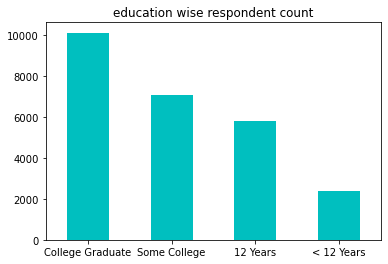

In [9]:
#View distribution by education
train_df.education.value_counts().plot(kind='bar',rot=0,title ='education wise respondent count',color='c');# improve aesthetics of the graph

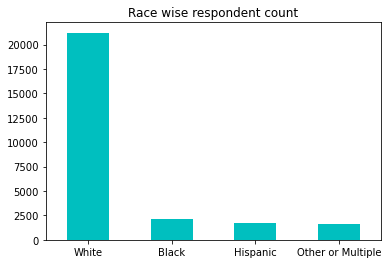

In [10]:
#View distribution by race
train_df.race.value_counts().plot(kind='bar',rot=0,title ='Race wise respondent count',color='c');# improve aesthetics of the graph

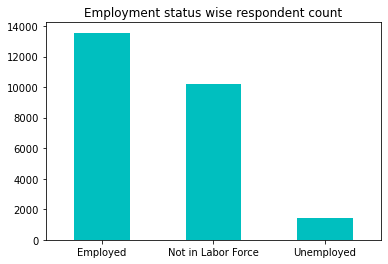

In [11]:
#View distribution by employment_status
train_df.employment_status.value_counts().plot(kind='bar',rot=0,title ='Employment status wise respondent count',color='c');# improve aesthetics of the graph
#use semicolon at the end to supress the matplotlib text above the graph

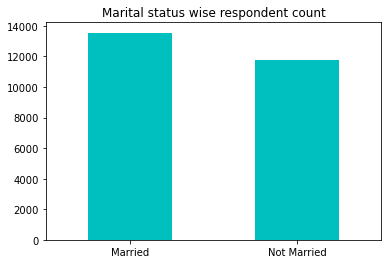

In [12]:
#View distribution by marital_status
train_df.marital_status.value_counts().plot(kind='bar',rot=0,title ='Marital status wise respondent count',color='c');# improve aesthetics of the graph


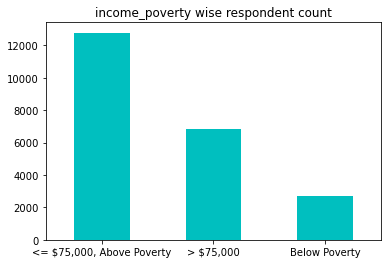

In [13]:
#View distribution by income_poverty
train_df.income_poverty.value_counts().plot(kind='bar',rot=0,title ='income_poverty wise respondent count',color='c');# improve aesthetics of the graph

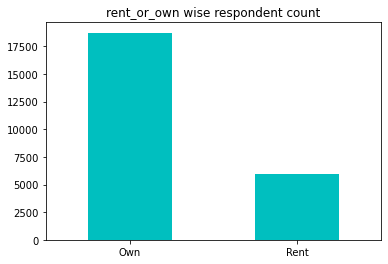

In [14]:
#View distribution by rent_or_own
train_df.rent_or_own.value_counts().plot(kind='bar',rot=0,title ='rent_or_own wise respondent count',color='c');# improve aesthetics of the graph

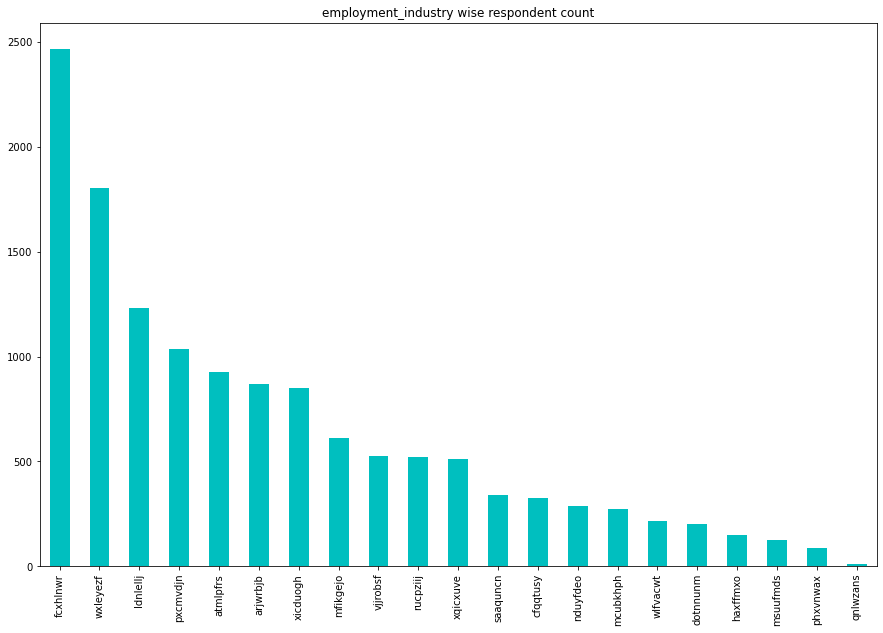

In [21]:
#View distribution by employment_industry
train_df.employment_industry.value_counts().plot(kind='bar',rot=90,title ='employment_industry wise respondent count',color='c',figsize=(15,10));# improve aesthetics of the graph

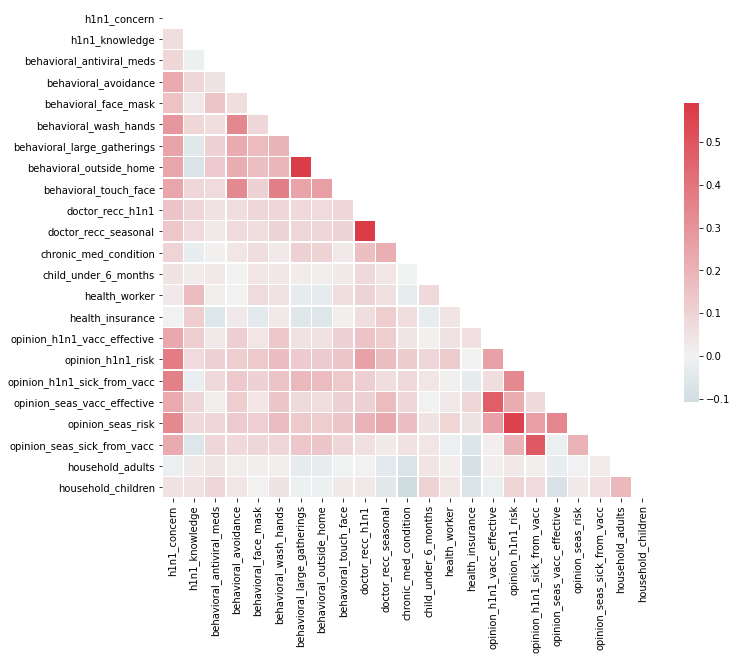

In [36]:
#create correlation matrix
train_corr=train_df.corr()
#plot sizing
ax = plt.subplots(figsize=(11,11))
#mask upper triangle of the matrix
mask = np.triu(train_corr)
#adding diverging pallettes for plot
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#heatmap plot
sns.heatmap(train_corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": 0.5});

In [37]:
train_df.shape

(26707, 35)